# 2024確率ロボティクス構築の課題
### MCLの簡単なシミュレーションの実装
2次元のシミュレーション内でロボットの移動ともにパーティクルフィルタによる自己位置推定を行う．
### 出力結果
ロボット位置：赤い丸  
ランドマーク：緑の×  
パーティクル：青い点




In [15]:
#numpyとグラフ表示をするためのmatplotをインポート
import numpy as np
import matplotlib.pyplot as plt


In [7]:

num_particles = 1000 #パーティクルの数を設定
world_size = [100, 100]  # 2次元空間
landmarks = np.array([[20, 20], [60, 80], [80, 50]])  # ランドマークの位置をNumPy配列として定義．位置は適当

In [8]:
# 最初にランダムにパーティクルを散布
particles = np.random.uniform(0, world_size, size=(num_particles, 2))

In [9]:
# ロボットの移動と観測モデルにおけるノイズの標準偏差を設定
motion_noise = 2
measurement_noise = 5

In [10]:
# パーティクルの移動を行う関数
def move_particles(particles, delta):　
    particles += delta + np.random.normal(0, motion_noise, size=(num_particles, 2))
    particles %= world_size  # 周期的な世界

In [11]:
# 観測に基づく重み付けを計算する関数
def measurement_prob(particles, measurement):
    prob = np.exp(-0.5 * np.sum(((particles - measurement) / measurement_noise)**2, axis=1)) / (np.sqrt(2 * np.pi) * measurement_noise)
    return prob / prob.sum()

In [12]:
# ボットの移動と観測をシミュレートする関数
def robot_action(true_position, delta):
    true_position = (true_position + delta) % world_size
    measurement = true_position + np.random.normal(0, measurement_noise, size=2)
    return true_position, measurement


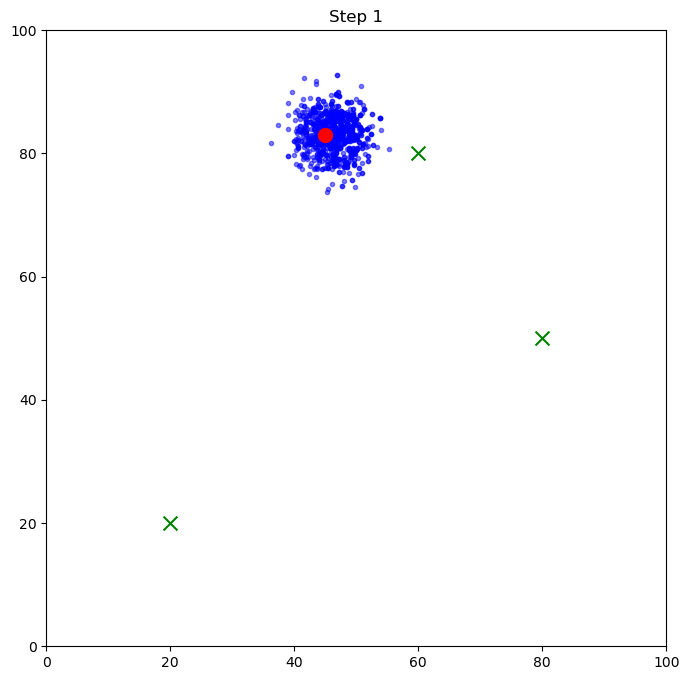

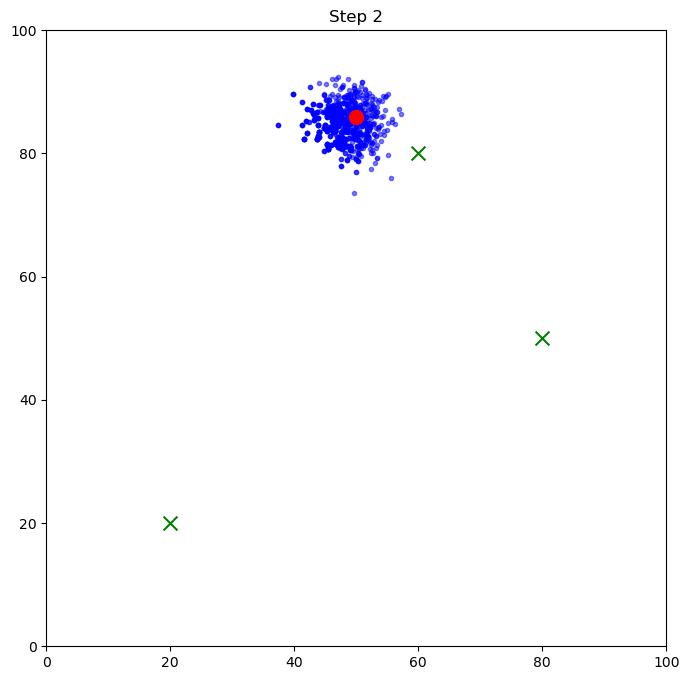

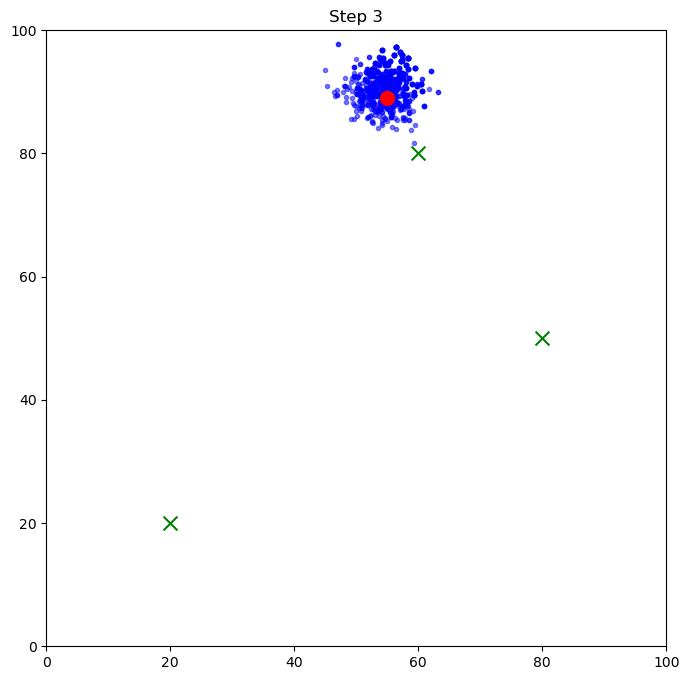

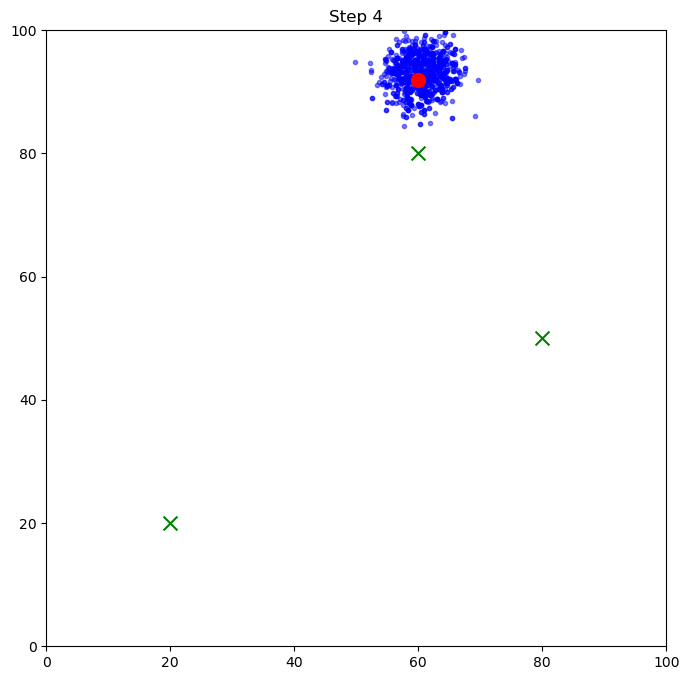

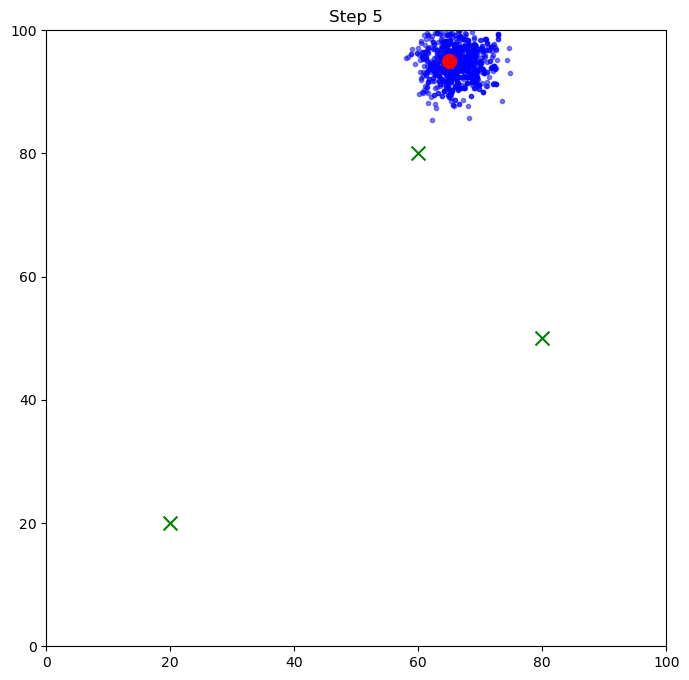

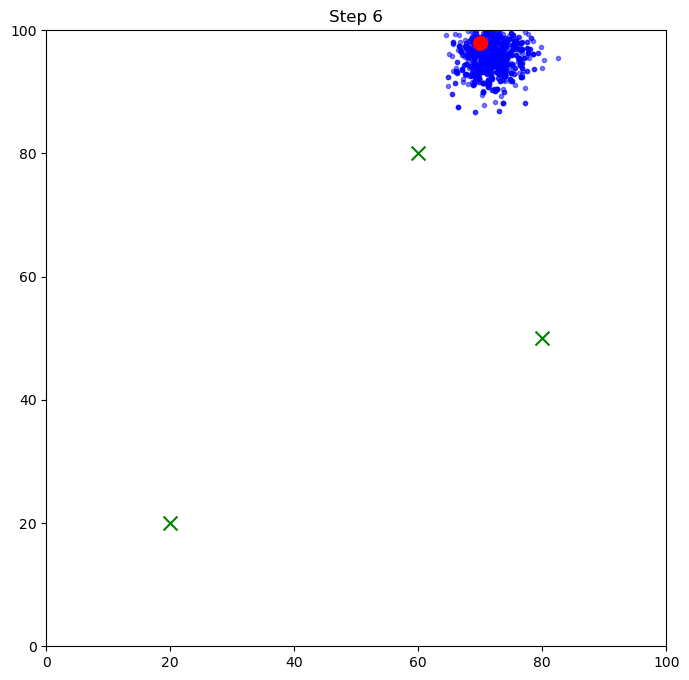

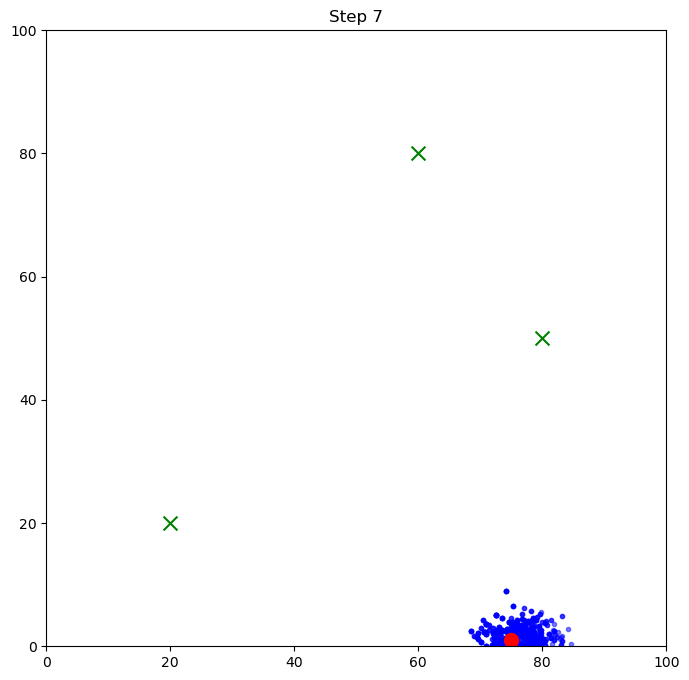

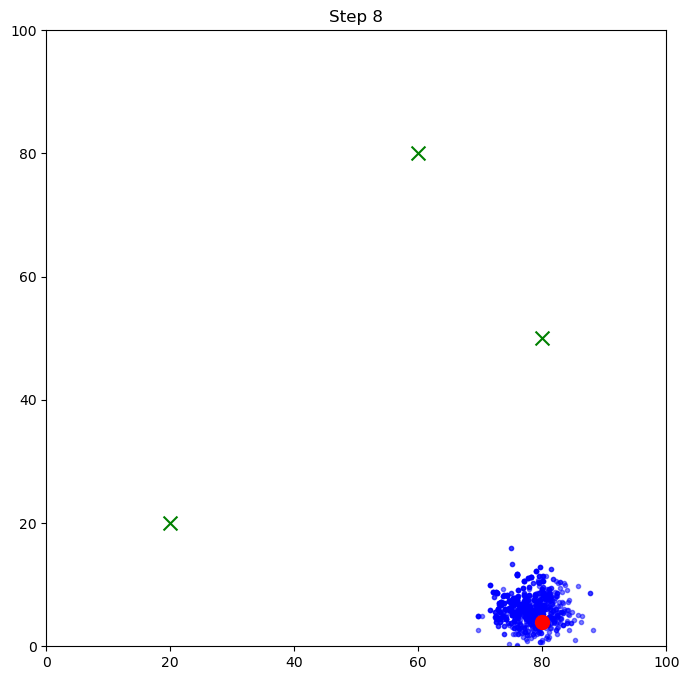

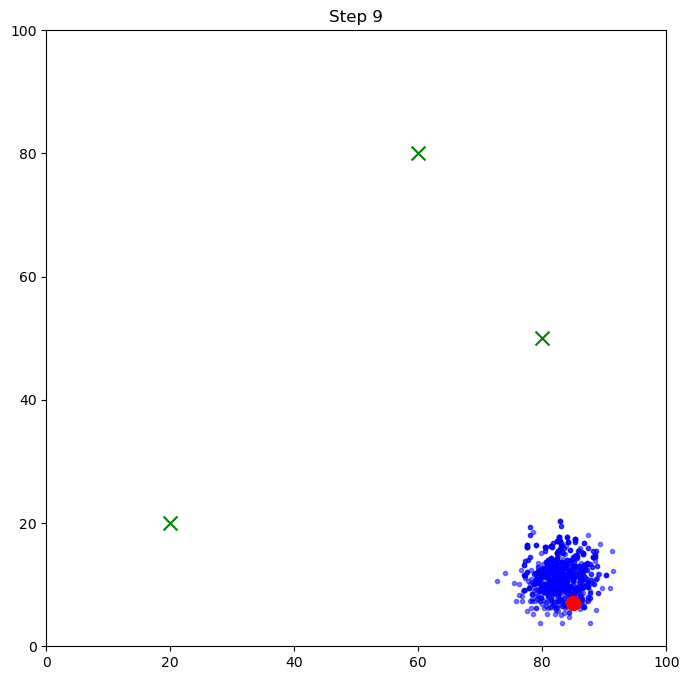

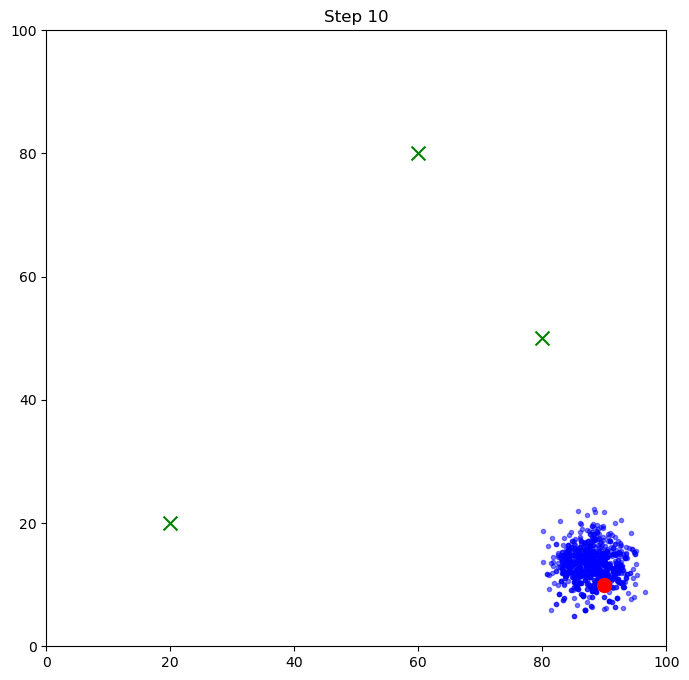

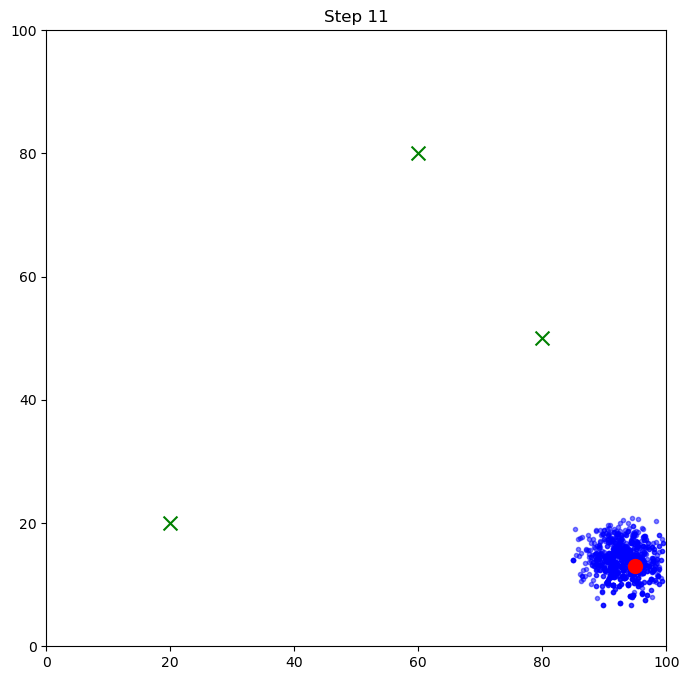

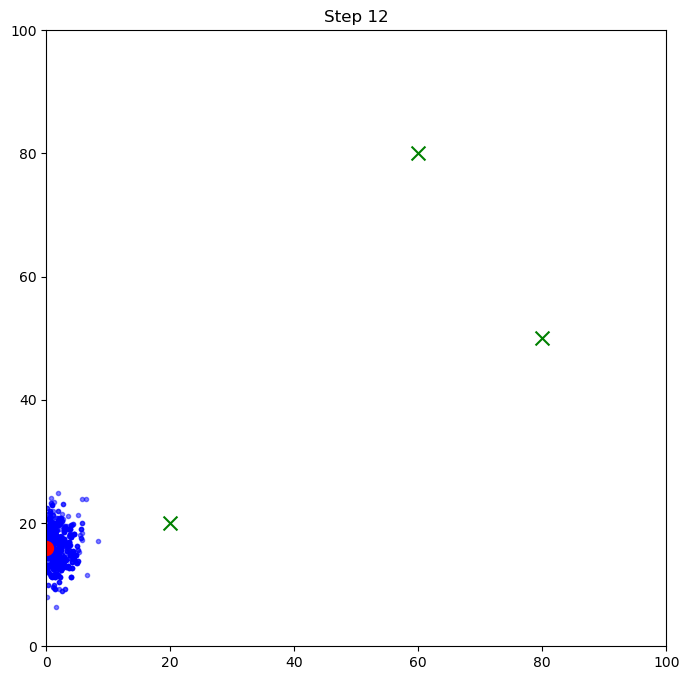

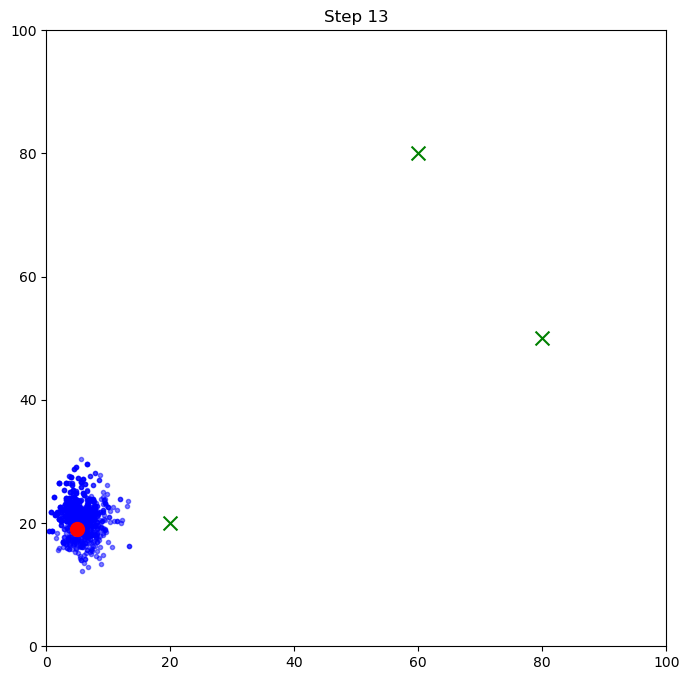

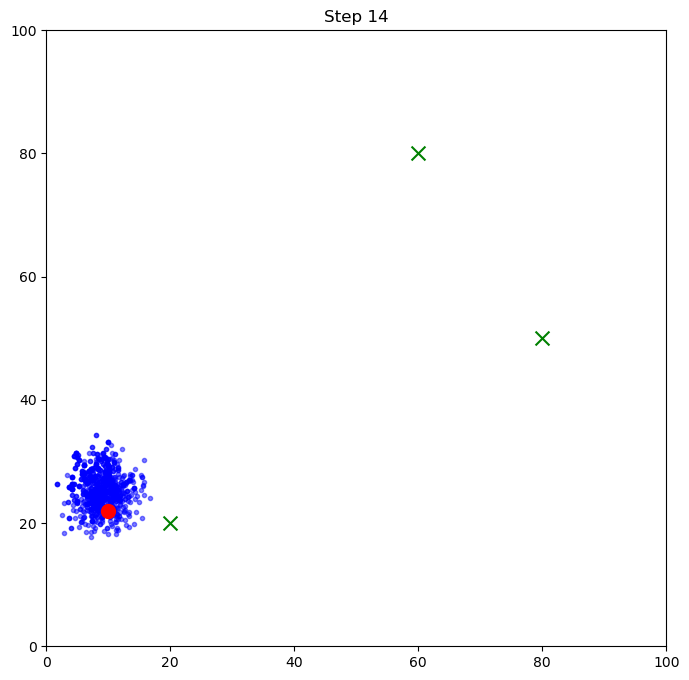

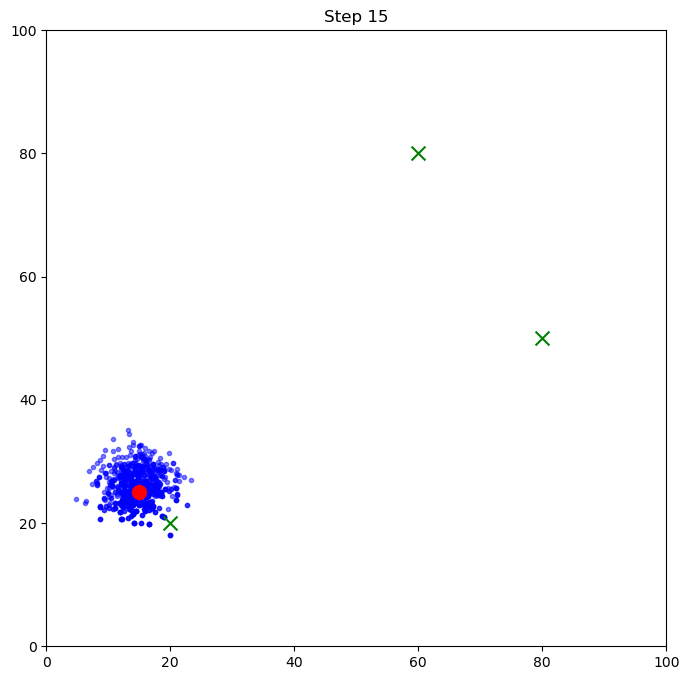

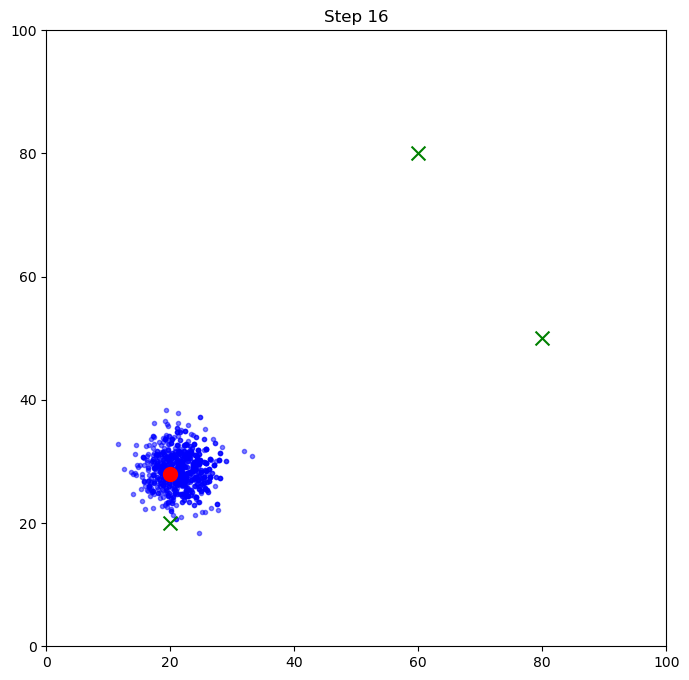

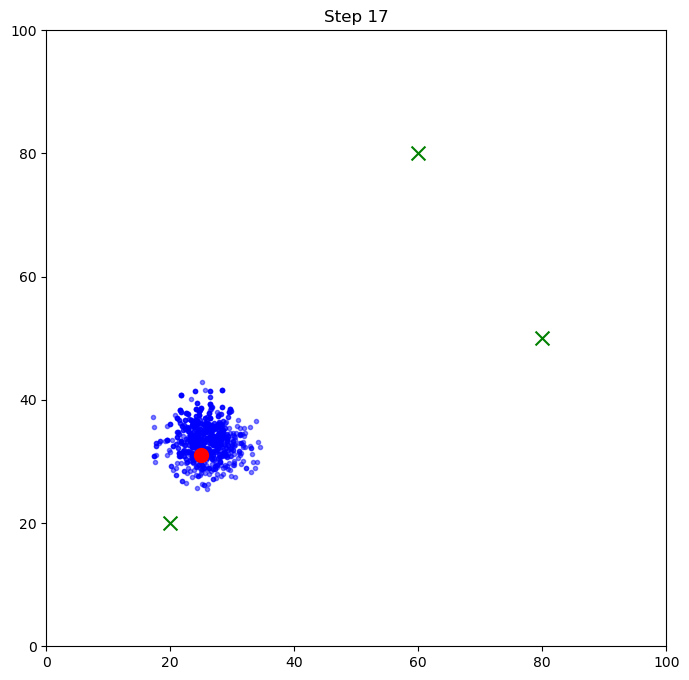

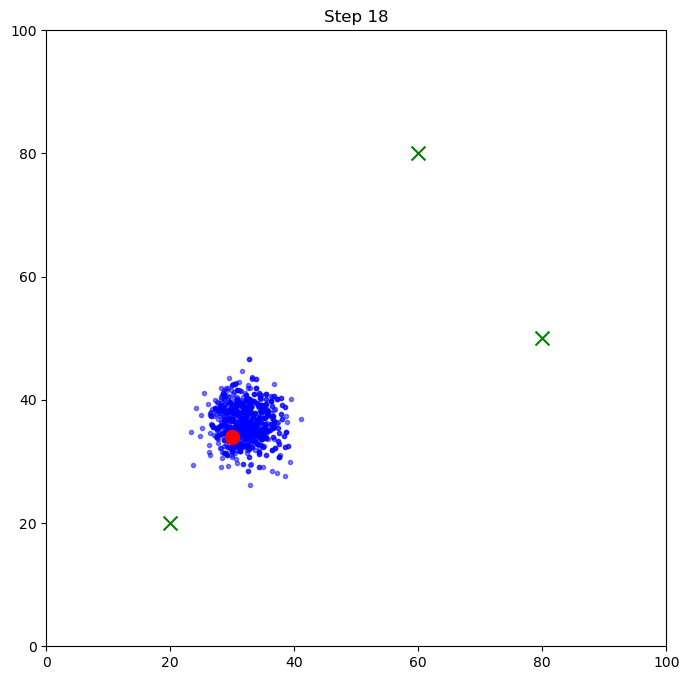

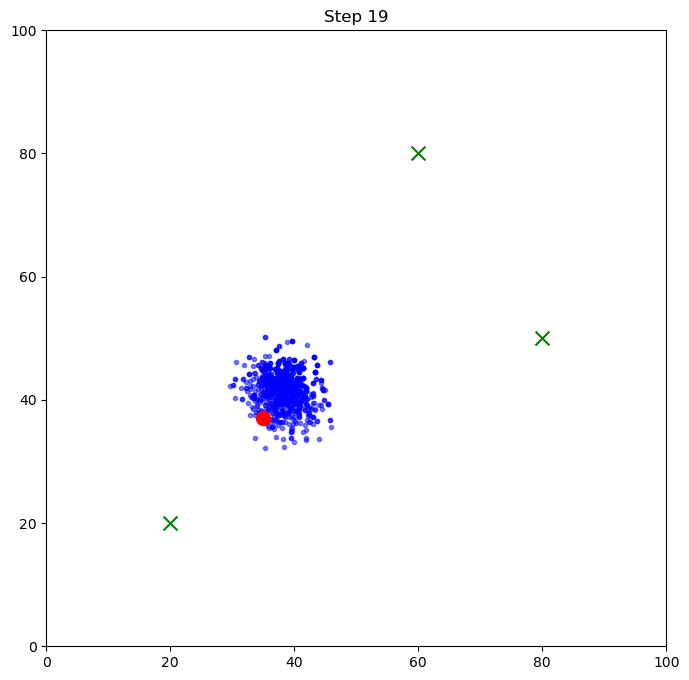

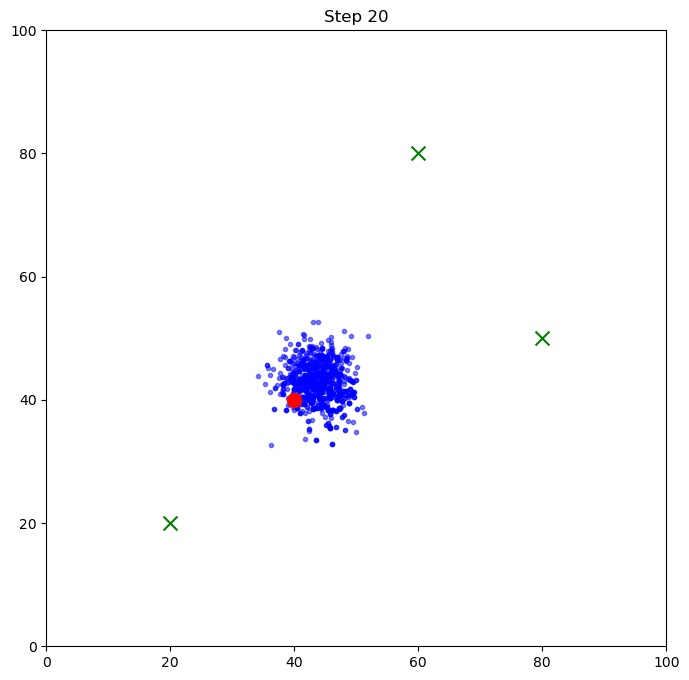

In [16]:
# メインのシミュレーションループ
num_steps = 20 #シミュレーションのステップ数
for step in range(num_steps):
    true_position, measurement = robot_action(true_position, delta=np.array([5, 3]))
    
    move_particles(particles, delta=np.array([5, 3]))
    
    weights = measurement_prob(particles, measurement)
    
    # リサンプリング
    indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
    particles = particles[indices]

    # 出力
    plt.figure(figsize=(8, 8))
    plt.scatter(particles[:, 0], particles[:, 1], marker='.', color='blue', alpha=0.5)
    plt.scatter(true_position[0], true_position[1], marker='o', color='red', s=100)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], marker='x', color='green', s=100)
    plt.title(f"Step {step+1}")
    plt.xlim(0, world_size[0])
    plt.ylim(0, world_size[1])
    plt.show()